<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Zomato_Restaurant_Insights/blob/main/Zomato_Restaurant_Insights_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#Importing the Libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
#Creating the DataFrame..
dataframe = pd.read_csv("Zomato-data-.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [120]:
#We are converting the Rate column from fractions to floats..
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [121]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [122]:
#Checking for missing/null values in each column
print(dataframe.isnull().sum())


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [123]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


**We will explore Restaurant types to Identify Popular Categories.**

Text(0.5, 0, 'Type of restaurant')

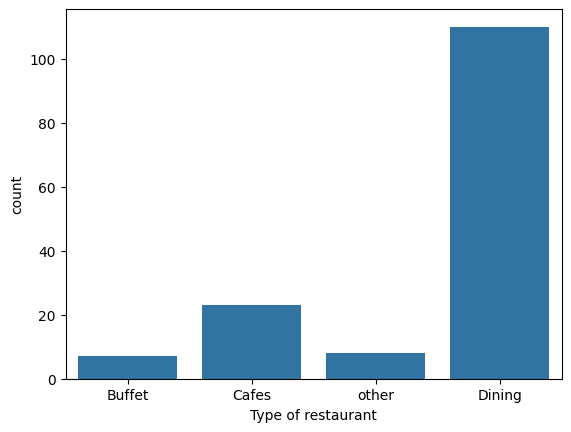

In [124]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion: Most restaurants are categorized as dining...

**Distribution of Votes Across Restaurant Types..**

Text(0, 0.5, 'Votes')

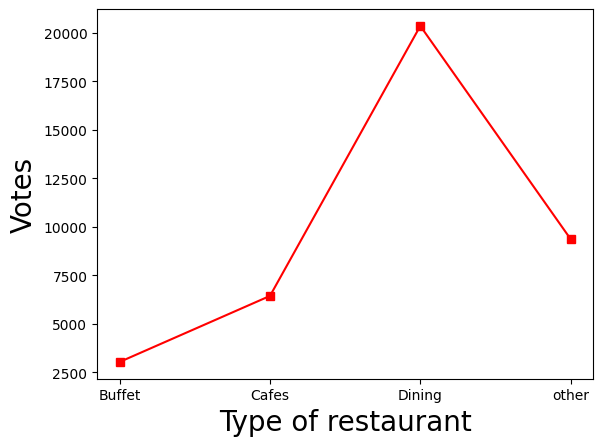

In [125]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='red', marker='s')
plt.xlabel('Type of restaurant', c='black', size=20)
plt.ylabel('Votes', c='black', size=20)

Conclusion: Dining emerges as the most preferred restaurant type.

**Determining the Restaurant with the Highest Votes**

In [126]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


**Analyzing the online_order Column to Determine How many Restaurants provide Online Ordering**

<Axes: xlabel='online_order', ylabel='count'>

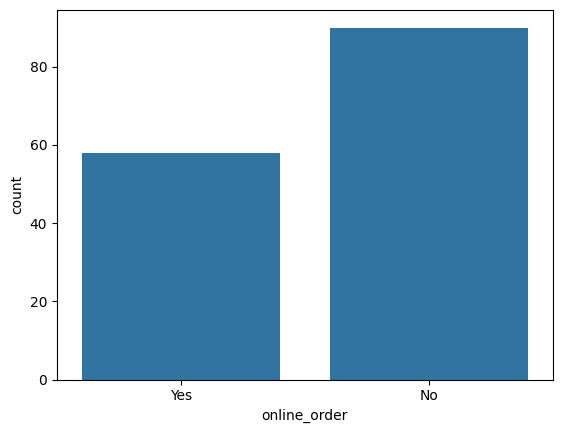

In [127]:
sns.countplot(x=dataframe['online_order'])

Conclusion: The majority of restaurants do not offer online ordering.

**Analysis of Customer Ratings**

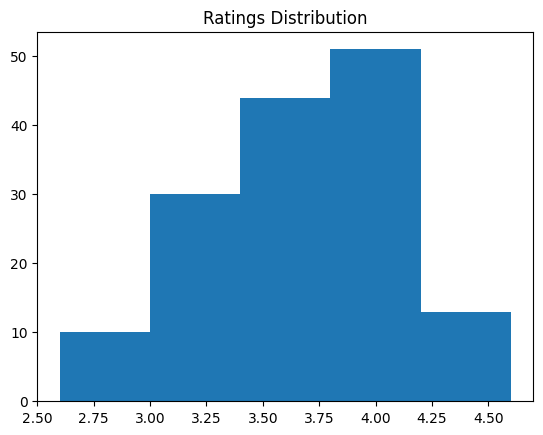

In [128]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion: The majority of restaurants fall within the 3.5-4 rating range.

**Identify the preferred cost range for couples.**

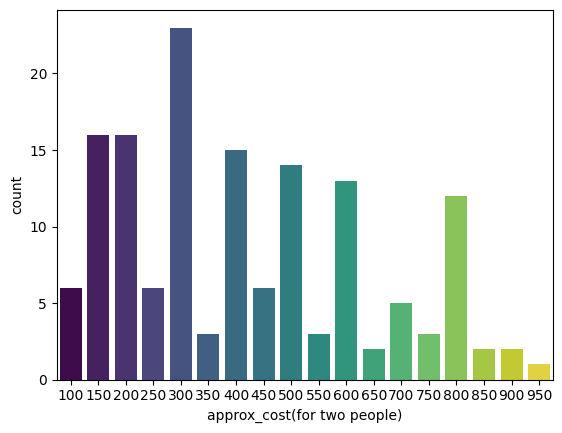

In [129]:
sns.countplot(x='approx_cost(for two people)', hue='approx_cost(for two people)', data=dataframe, palette='viridis', legend=False)
# Create a count plot for 'approx_cost(for two people)'
# x='approx_cost(for two people)' specifies the column for the x-axis
# hue='approx_cost(for two people)' assigns a unique color to each unique cost value
# data=dataframe tells Seaborn which DataFrame to use
# palette='viridis' applies a vibrant colormap to the bars
# legend=False hides the legend since each bar is already labeled on the x-axis
plt.show()


Conclusion: Most couples prefer restaurants with an approximate cost of ₹300.

**Evaluating Customer Ratings: Online vs Offline**

<Axes: xlabel='online_order', ylabel='rate'>

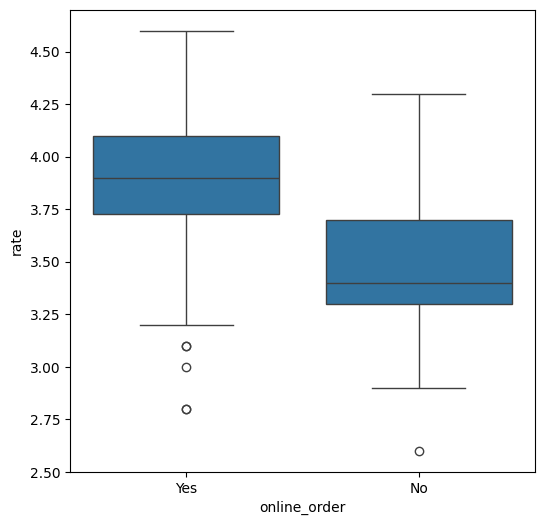

In [130]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Conclusion: Offline orders generally received Lower Ratings, while Online orders achieved Higher Ratings.

**Order Preferences Across Restaurant Types**

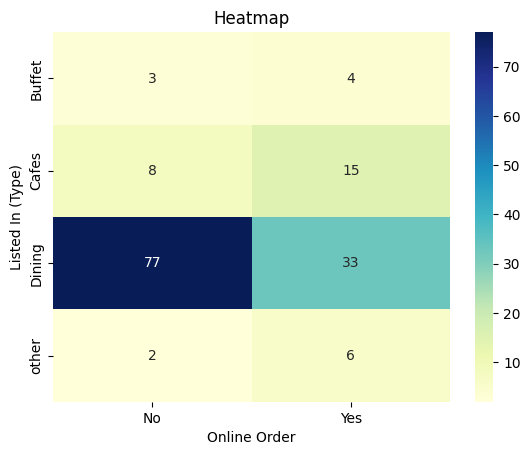

In [131]:
# Create a pivot table:
# index='listed_in(type)' → rows represent restaurant types
# columns='online_order' → columns represent whether online order is available (Yes/No)
# aggfunc='size' → counts the number of restaurants for each combination
# fill_value=0 → fills missing values with 0

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot heatmap of the pivot table:
# annot=True → shows the counts inside each cell
# cmap='YlGnBu' → applies yellow-green-blue color palette
# fmt='d' → formats annotations as integers

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This indicates that customers prefer in-person ordering when visiting restaurants, while online ordering is the dominant choice for cafes.